In [55]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("Environment ready")


Environment ready


In [56]:
import gdown

file_id = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "hyperliquid_trades.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/hyperliquid_trades.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 198MB/s]


'hyperliquid_trades.csv'

In [57]:
df = pd.read_csv("hyperliquid_trades.csv")


In [58]:
# Fear & Greed dataset file ID
sentiment_file_id = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
sentiment_url = f"https://drive.google.com/uc?id={sentiment_file_id}"

gdown.download(sentiment_url, "fear_greed_index.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed_index.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 29.9MB/s]


'fear_greed_index.csv'

In [59]:
sentiment_df = pd.read_csv("fear_greed_index.csv")

print("Sentiment data preview:")
display(sentiment_df.head())


Sentiment data preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [60]:
print("Shape of trader dataset:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())


Shape of trader dataset: (211224, 16)

Column names:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [61]:
print("\nDataset info:")
df.info()



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bo

In [62]:
df.describe(include='all')

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
count,211224,211224,211224.0000,211224.0000,211224.0000,211224,211224,211224.0000,211224,211224.0000,211224,211224.0000,211224,211224.0000,211224.0000,211224.0000
unique,32,246,NaN,NaN,NaN,2,27977,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,14-02-2025 00:31,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN
freq,40184,68005,NaN,NaN,NaN,108528,441,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN
mean,NaN,NaN,11414.7233,4623.3650,5639.4512,NaN,NaN,-29946.2488,NaN,48.7490,NaN,69653876008.9702,NaN,1.1640,562854854500788.5000,1737744290421.5430
std,NaN,NaN,29447.6549,104272.8895,36575.1385,NaN,NaN,673807.4237,NaN,919.1648,NaN,18357525271.9257,NaN,6.7589,325756470346523.3750,8689920301.5900
min,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,-14334629.0000,NaN,-117990.1041,NaN,173271100.0000,NaN,-1.1757,0.0000,1680000000000.0000
25%,NaN,NaN,4.8547,2.9400,193.7900,NaN,NaN,-376.2311,NaN,0.0000,NaN,59838527992.7500,NaN,0.0161,281000000000000.0000,1740000000000.0000
50%,NaN,NaN,18.2800,32.0000,597.0450,NaN,NaN,84.7279,NaN,0.0000,NaN,74429390066.0000,NaN,0.0896,562000000000000.0000,1740000000000.0000
75%,NaN,NaN,101.5800,187.9025,2058.9600,NaN,NaN,9337.2775,NaN,5.7928,NaN,83355430544.0000,NaN,0.3938,846000000000000.0000,1740000000000.0000


In [63]:
print("Sentiment dataset shape:", sentiment_df.shape)
print("\nColumn names:")
print(sentiment_df.columns.tolist())

print("\nSentiment dataset info:")
sentiment_df.info()


Sentiment dataset shape: (2644, 4)

Column names:
['timestamp', 'value', 'classification', 'date']

Sentiment dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [64]:
print(sentiment_df.columns.tolist())

['timestamp', 'value', 'classification', 'date']


In [65]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])


In [66]:
print(sentiment_df['classification'].unique())

['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']


In [67]:
def map_sentiment(x):
    if x in ['Fear', 'Extreme Fear']:
        return 'Fear'
    elif x in ['Greed', 'Extreme Greed']:
        return 'Greed'
    else:
        return 'Neutral'

sentiment_df['market_sentiment'] = sentiment_df['classification'].apply(map_sentiment)

In [68]:
sentiment_clean = sentiment_df[sentiment_df['market_sentiment'] != 'Neutral'][['date', 'market_sentiment']].copy()

display(sentiment_clean.head())


,date,market_sentiment
0,2018-02-01,Fear
1,2018-02-02,Fear
2,2018-02-03,Fear
3,2018-02-04,Fear
4,2018-02-05,Fear


Neutral sentiment days were excluded to focus the analysis on high-conviction Fear and Greed regimes, which represent periods of strong market emotion and clearer behavioral signals.

In [69]:
sentiment_clean['market_sentiment'].value_counts()


,count
market_sentiment,
Fear,1289
Greed,959


In [70]:
trader_df = df.copy()

trader_df.rename(columns={
    'Account': 'account',
    'Size USD': 'size_usd',
    'Closed PnL': 'closed_pnl',
    'Timestamp IST': 'timestamp_ist'
}, inplace=True)

print(trader_df.columns.tolist())


['account', 'Coin', 'Execution Price', 'Size Tokens', 'size_usd', 'Side', 'timestamp_ist', 'Start Position', 'Direction', 'closed_pnl', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [71]:
print('Unique accounts:', trader_df['account'].nunique())
print(trader_df['account'].unique())

print('\nUnique coins:', trader_df['Coin'].nunique())
print(trader_df['Coin'].unique())

Unique accounts: 32
['0xae5eacaf9c6b9111fd53034a602c192a04e082ed'
 '0x72c6a4624e1dffa724e6d00d64ceae698af892a0'
 '0x513b8629fe877bb581bf244e326a047b249c4ff1'
 '0x083384f897ee0f19899168e3b1bec365f52a9012'
 '0x430f09841d65beb3f27765503d0f850b8bce7713'
 '0x8381e6d82f1affd39a336e143e081ef7620a3b7f'
 '0x4f93fead39b70a1824f981a54d4e55b278e9f760'
 '0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4'
 '0x420ab45e0bd8863569a5efbb9c05d91f40624641'
 '0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23'
 '0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd'
 '0x6d6a4b953f202f8df5bed40692e7fd865318264a'
 '0xbaaaf6571ab7d571043ff1e313a9609a10637864'
 '0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb'
 '0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891'
 '0xa0feb3725a9335f49874d7cd8eaad6be45b27416'
 '0x8477e447846c758f5a675856001ea72298fd9cb5'
 '0x8170715b3b381dffb7062c0298972d4727a0a63b'
 '0x47add9a56df66b524d5e2c1993a43cde53b6ed85'
 '0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6'
 '0x28736f43f1e871e6aa8b1148d38d4994275d72c4'
 '0x39cef799f8

In [72]:
trader_df['timestamp_ist'] = trader_df['timestamp_ist'].str.replace('.', ':', regex=False)
# converting 22.50 to 22:50

In [73]:
trader_df['timestamp_ist'] = pd.to_datetime(
    trader_df['timestamp_ist'],
    format='%d-%m-%Y %H:%M'
)

In [74]:
trader_df['date'] = trader_df['timestamp_ist'].dt.normalize()


In [75]:
display(
    trader_df[['account', 'timestamp_ist', 'date', 'size_usd', 'closed_pnl']].head()
)

print("Date range:", trader_df['date'].min(), "to", trader_df['date'].max())
print("\nClosed PnL summary:")
print(trader_df['closed_pnl'].describe())


,account,timestamp_ist,date,size_usd,closed_pnl
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,2024-12-02,7872.1600,0.0000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,2024-12-02,127.6800,0.0000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,2024-12-02,1150.6300,0.0000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,2024-12-02,1142.0400,0.0000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,2024-12-02,69.7500,0.0000


Date range: 2023-05-01 00:00:00 to 2025-05-01 00:00:00

Closed PnL summary:
count    211224.0000
mean         48.7490
std         919.1648
min     -117990.1041
25%           0.0000
50%           0.0000
75%           5.7928
max      135329.0901
Name: closed_pnl, dtype: float64


In [76]:
# merging trader data with sentiment
trader_merged = trader_df.merge(
    sentiment_clean,
    on='date',
    how='inner'
)

print("Merged dataset shape:", trader_merged.shape)
display(trader_merged.head())


Merged dataset shape: (173532, 18)


,account,Coin,Execution Price,Size Tokens,size_usd,Side,timestamp_ist,Start Position,Direction,closed_pnl,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,market_sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.1600,BUY,2024-12-02 22:50:00,0.0000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.3454,895000000000000.0000,1730000000000.0000,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.6800,BUY,2024-12-02 22:50:00,986.5246,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0056,443000000000000.0000,1730000000000.0000,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.6300,BUY,2024-12-02 22:50:00,1002.5190,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0504,660000000000000.0000,1730000000000.0000,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.0400,BUY,2024-12-02 22:50:00,1146.5586,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0500,1080000000000000.0000,1730000000000.0000,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.7500,BUY,2024-12-02 22:50:00,1289.4885,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0031,1050000000000000.0000,1730000000000.0000,2024-12-02,Greed


In [77]:
trader_merged['market_sentiment'].value_counts()


,count
market_sentiment,
Greed,90295
Fear,83237


In [78]:
trader_metrics = (
    trader_merged
    .groupby(['account', 'market_sentiment'])
    .agg(
        total_pnl=('closed_pnl', 'sum'),
        trade_count=('closed_pnl', 'count'),
        avg_trade_size=('size_usd', 'mean'),
        pnl_std=('closed_pnl', 'std'),
        fee_paid=('Fee', 'sum')
    )
    .reset_index()
)

display(trader_metrics.head())

,account,market_sentiment,total_pnl,trade_count,avg_trade_size,pnl_std,fee_paid
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1238142.7690,1878,16916.6884,5278.0133,3389.8377
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,236436.9343,1519,13234.2637,4457.9284,2714.3264
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,-5893.8899,2792,1053.1072,152.1866,639.3233
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,65712.2905,3768,2125.9396,117.0900,1828.9007
4,0x271b280974205ca63b716753467d5a371de622ab,Fear,46828.7954,2665,6896.3691,78.9074,5097.9773


In [79]:
win_rate_df = (
    trader_merged
    .assign(win=lambda x: x['closed_pnl'] > 0)
    .groupby(['account', 'market_sentiment'])['win']
    .mean()
    .reset_index(name='win_rate')
)

trader_metrics = trader_metrics.merge(
    win_rate_df,
    on=['account', 'market_sentiment'],
    how='left'
)

display(trader_metrics.head())


,account,market_sentiment,total_pnl,trade_count,avg_trade_size,pnl_std,fee_paid,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1238142.7690,1878,16916.6884,5278.0133,3389.8377,0.5181
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,236436.9343,1519,13234.2637,4457.9284,2714.3264,0.1020
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,-5893.8899,2792,1053.1072,152.1866,639.3233,0.4674
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,65712.2905,3768,2125.9396,117.0900,1828.9007,0.4400
4,0x271b280974205ca63b716753467d5a371de622ab,Fear,46828.7954,2665,6896.3691,78.9074,5097.9773,0.3805


In [80]:
trader_pivot = trader_metrics.pivot(
    index='account',
    columns='market_sentiment',
    values=['total_pnl', 'avg_trade_size', 'win_rate', 'trade_count']
)

display(trader_pivot.head())


total_pnl              \
market_sentiment                                   Fear       Greed   
account                                                               
0x083384f897ee0f19899168e3b1bec365f52a9012 1238142.7690 236436.9343   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   -5893.8899  65712.2905   
0x271b280974205ca63b716753467d5a371de622ab   46828.7954 -98226.6462   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  -12243.4874 139202.5526   
0x2c229d22b100a7beb69122eed721cee9b24011dd   15394.4386 110970.7234   

                                           avg_trade_size            win_rate  \
market_sentiment                                     Fear      Greed     Fear   
account                                                                         
0x083384f897ee0f19899168e3b1bec365f52a9012     16916.6884 13234.2637   0.5181   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd      1053.1072  2125.9396   0.4674   
0x271b280974205ca63b716753467d5a371de622ab      6896.3691 19534.6723   0.3805   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4       699.9583   456.0852   0.3887   
0x2c229d22b100a7beb69122eed721cee9b24011dd      1748.4460  3502.0238   0.4909   

                                                  trade_count             
market_sentiment                            Greed        Fear      Greed  
account                                                                   
0x083384f897ee0f19899168e3b1bec365f52a9012 0.1020   1878.0000  1519.0000  
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd 0.4400   2792.0000  3768.0000  
0x271b280974205ca63b716753467d5a371de622ab 0.2495   2665.0000   545.0000  
0x28736f43f1e871e6aa8b1148d38d4994275d72c4 0.4456   1973.0000 10451.0000  
0x2c229d22b100a7beb69122eed721cee9b24011dd 0.4957    493.0000  1731.0000

In [81]:
cols_to_drop = [
    'Transaction Hash',
    'Order ID',
    'Trade ID',
    'Timestamp',
    'Crossed',
    'Start Position',
    'Execution Price',
    'Size Tokens',
    'Coin'
]

trader_merged_clean = trader_merged.drop(columns=cols_to_drop, errors='ignore')

print(trader_merged_clean.columns.tolist())


['account', 'size_usd', 'Side', 'timestamp_ist', 'Direction', 'closed_pnl', 'Fee', 'date', 'market_sentiment']


In [82]:
overall_stats = (
    trader_merged_clean
    .groupby('market_sentiment')
    .agg(
        total_pnl=('closed_pnl', 'sum'),
        avg_trade_size=('size_usd', 'mean'),
        trade_count=('closed_pnl', 'count'),
        avg_fee=('Fee', 'mean'),
        win_rate=('closed_pnl', lambda x: (x > 0).mean())
    )
    .reset_index()
)

display(overall_stats)

,market_sentiment,total_pnl,avg_trade_size,trade_count,avg_fee,win_rate
0,Fear,4096265.6901,7182.0110,83237,1.3978,0.4079
1,Greed,4865300.5836,4574.4245,90295,0.9982,0.4203


In [83]:
top_fear_traders = (
    trader_metrics
    [trader_metrics['market_sentiment'] == 'Fear']
    .sort_values('total_pnl', ascending=False)
    .head(10)
)

display(top_fear_traders[['account', 'total_pnl', 'win_rate', 'avg_trade_size', 'trade_count']])


,account,total_pnl,win_rate,avg_trade_size,trade_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1238142.7690,0.5181,16916.6884,1878
57,0xbaaaf6571ab7d571043ff1e313a9609a10637864,882790.3536,0.4668,3585.7348,16917
22,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,463478.1223,0.3678,12035.8910,2382
32,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,343414.9062,0.5690,1854.9563,652
26,0x513b8629fe877bb581bf244e326a047b249c4ff1,296044.3962,0.3668,36103.0287,6327
59,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,274510.2511,0.4375,9304.1793,1568
38,0x8170715b3b381dffb7062c0298972d4727a0a63b,164006.2260,0.2952,2618.9214,1904
16,0x420ab45e0bd8863569a5efbb9c05d91f40624641,109109.3606,0.2390,4821.7919,159
54,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,102710.0675,0.3240,1611.3512,3744
61,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,86752.8891,0.3869,1487.1263,17980


In [84]:
top_greed_traders = (
    trader_metrics
    [trader_metrics['market_sentiment'] == 'Greed']
    .sort_values('total_pnl', ascending=False)
    .head(10)
)

display(top_greed_traders[['account', 'total_pnl', 'win_rate', 'avg_trade_size', 'trade_count']])


,account,total_pnl,win_rate,avg_trade_size,trade_count
55,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1639363.0955,0.3249,5502.7244,7532
62,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,722210.9813,0.5276,2427.2452,14061
31,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,453595.3182,0.2721,9928.8574,691
19,0x430f09841d65beb3f27765503d0f850b8bce7713,351965.4405,0.6442,1650.7592,787
35,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,306664.2495,0.8356,2897.7959,6449
1,0x083384f897ee0f19899168e3b1bec365f52a9012,236436.9343,0.1020,13234.2637,1519
25,0x4f93fead39b70a1824f981a54d4e55b278e9f760,208241.1580,0.3385,16853.7175,4780
27,0x513b8629fe877bb581bf244e326a047b249c4ff1,163047.6649,0.3517,36181.2002,3392
7,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,139202.5526,0.4456,456.0852,10451
45,0x92f17e8d81a944691c10e753af1b1baae1a2cd0d,123774.5262,0.3049,3056.5091,2748


In [85]:
consistent_traders = (
    trader_pivot
    .dropna(subset=[('total_pnl', 'Fear'), ('total_pnl', 'Greed')])
    .reset_index()
)

consistent_traders['pnl_diff'] = (
    consistent_traders[('total_pnl', 'Greed')] -
    consistent_traders[('total_pnl', 'Fear')]
)

display(
    consistent_traders
    .sort_values(by=[('total_pnl', 'Fear'), ('total_pnl', 'Greed')], ascending=False)
    .head(10)
)


account    total_pnl  \
market_sentiment                                                     Fear   
0                 0x083384f897ee0f19899168e3b1bec365f52a9012 1238142.7690   
28                0xbaaaf6571ab7d571043ff1e313a9609a10637864  882790.3536   
11                0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  463478.1223   
16                0x72c6a4624e1dffa724e6d00d64ceae698af892a0  343414.9062   
13                0x513b8629fe877bb581bf244e326a047b249c4ff1  296044.3962   
29                0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  274510.2511   
19                0x8170715b3b381dffb7062c0298972d4727a0a63b  164006.2260   
8                 0x420ab45e0bd8863569a5efbb9c05d91f40624641  109109.3606   
27                0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  102710.0675   
30                0xbee1707d6b44d4d52bfe19e41f8a828645437aab   86752.8891   

                              avg_trade_size            win_rate         \
market_sentiment        Greed           Fear      Greed     Fear  Greed   
0                 236436.9343     16916.6884 13234.2637   0.5181 0.1020   
28                     4.6725      3585.7348    71.2340   0.4668 0.2000   
11                116888.8374     12035.8910  5557.6816   0.3678 0.5653   
16                 21651.3023      1854.9563  2254.2556   0.5690 0.0853   
13                163047.6649     36103.0287 36181.2002   0.3668 0.3517   
29                 36311.3644      9304.1793  2624.8705   0.4375 0.1682   
19               -379237.8115      2618.9214  1778.7408   0.2952 0.5191   
8                  16102.5686      4821.7919  5784.2572   0.2390 0.1534   
27               1639363.0955      1611.3512  5502.7244   0.3240 0.3249   
30                722210.9813      1487.1263  2427.2452   0.3869 0.5276   

                 trade_count                 pnl_diff  
market_sentiment        Fear      Greed                
0                  1878.0000  1519.0000 -1001705.8347  
28                16917.0000     5.0000  -882785.6812  
11                 2382.0000  1302.0000  -346589.2850  
16                  652.0000   715.0000  -321763.6039  
13                 6327.0000  3392.0000  -132996.7313  
29                 1568.0000   660.0000  -238198.8867  
19                 1904.0000  1751.0000  -543244.0375  
8                   159.0000   176.0000   -93006.7920  
27                 3744.0000  7532.0000  1536653.0280  
30                17980.0000 14061.0000   635458.0922

In [86]:
print(consistent_traders.columns)


MultiIndex([(       'account',      ''),
            (     'total_pnl',  'Fear'),
            (     'total_pnl', 'Greed'),
            ('avg_trade_size',  'Fear'),
            ('avg_trade_size', 'Greed'),
            (      'win_rate',  'Fear'),
            (      'win_rate', 'Greed'),
            (   'trade_count',  'Fear'),
            (   'trade_count', 'Greed'),
            (      'pnl_diff',      '')],
           names=[None, 'market_sentiment'])


In [87]:
consistent_traders_clean = consistent_traders.copy()
consistent_traders_clean.index = range(1, len(consistent_traders_clean) + 1)

display(
    consistent_traders_clean[
        [('account', ''),
         ('total_pnl', 'Fear'),
         ('total_pnl', 'Greed'),
         ('avg_trade_size', 'Fear'),
         ('avg_trade_size', 'Greed')]
    ]
)

account    total_pnl  \
market_sentiment                                                     Fear   
1                 0x083384f897ee0f19899168e3b1bec365f52a9012 1238142.7690   
2                 0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   -5893.8899   
3                 0x271b280974205ca63b716753467d5a371de622ab   46828.7954   
4                 0x28736f43f1e871e6aa8b1148d38d4994275d72c4  -12243.4874   
5                 0x2c229d22b100a7beb69122eed721cee9b24011dd   15394.4386   
6                 0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  -57434.8847   
7                 0x39cef799f8b69da1995852eea189df24eb5cae3c  -21494.4737   
8                 0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6    4367.1127   
9                 0x420ab45e0bd8863569a5efbb9c05d91f40624641  109109.3606   
10                0x430f09841d65beb3f27765503d0f850b8bce7713    5615.0521   
11                0x47add9a56df66b524d5e2c1993a43cde53b6ed85   -4527.9583   
12                0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  463478.1223   
13                0x4f93fead39b70a1824f981a54d4e55b278e9f760   55220.3885   
14                0x513b8629fe877bb581bf244e326a047b249c4ff1  296044.3962   
15                0x6d6a4b953f202f8df5bed40692e7fd865318264a    4077.6177   
16                0x72743ae2822edd658c0c50608fd7c5c501b2afbd  -24239.7523   
17                0x72c6a4624e1dffa724e6d00d64ceae698af892a0  343414.9062   
18                0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   75037.1137   
19                0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f    7259.3745   
20                0x8170715b3b381dffb7062c0298972d4727a0a63b  164006.2260   
21                0x8381e6d82f1affd39a336e143e081ef7620a3b7f   -4567.0810   
22                0x8477e447846c758f5a675856001ea72298fd9cb5   11073.7943   
23                0x92f17e8d81a944691c10e753af1b1baae1a2cd0d    2804.4159   
24                0xa0feb3725a9335f49874d7cd8eaad6be45b27416   13945.7283   
25                0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0  -17680.9622   
26                0xae5eacaf9c6b9111fd53034a602c192a04e082ed    8751.7514   
27                0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb   14542.7029   
28                0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  102710.0675   
29                0xbaaaf6571ab7d571043ff1e313a9609a10637864  882790.3536   
30                0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  274510.2511   
31                0xbee1707d6b44d4d52bfe19e41f8a828645437aab   86752.8891   

                              avg_trade_size             
market_sentiment        Greed           Fear      Greed  
1                 236436.9343     16916.6884 13234.2637  
2                  65712.2905      1053.1072  2125.9396  
3                 -98226.6462      6896.3691 19534.6723  
4                 139202.5526       699.9583   456.0852  
5                 110970.7234      1748.4460  3502.0238  
6                  27460.1918      1472.6112  2303.2598  
7                  24998.1451      4124.8746  7191.4760  
8                  41109.9715      4101.2622  2923.4370  
9                  16102.5686      4821.7919  5784.2572  
10                351965.4405      3294.5072  1650.7592  
11                103842.4328       549.7748   515.3940  
12                116888.8374     12035.8910  5557.6816  
13                208241.1580     17844.6856 16853.7175  
14                163047.6649     36103.0287 36181.2002  
15                103395.4782       899.7075   579.9994  
16                453595.3182      5497.1469  9928.8574  
17                 21651.3023      1854.9563  2254.2556  
18                306664.2495      2220.2849  2897.7959  
19                  8036.1246      3544.4923  4050.8033  
20               -379237.8115      2618.9214  1778.7408  
21                 57120.6290      3749.8612 19837.0486  
22                 32034.8719       954.4257   772.0170  
23                123774.5262      8364.4813  3056.5091  
24                 82890.1253      1112.1944  1401.7100  
25 

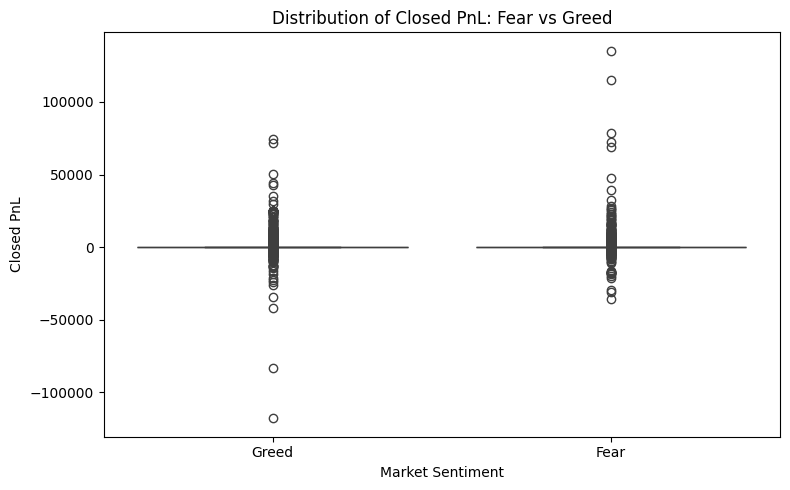

In [88]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=trader_merged_clean,
    x='market_sentiment',
    y='closed_pnl'
)
plt.title('Distribution of Closed PnL: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()


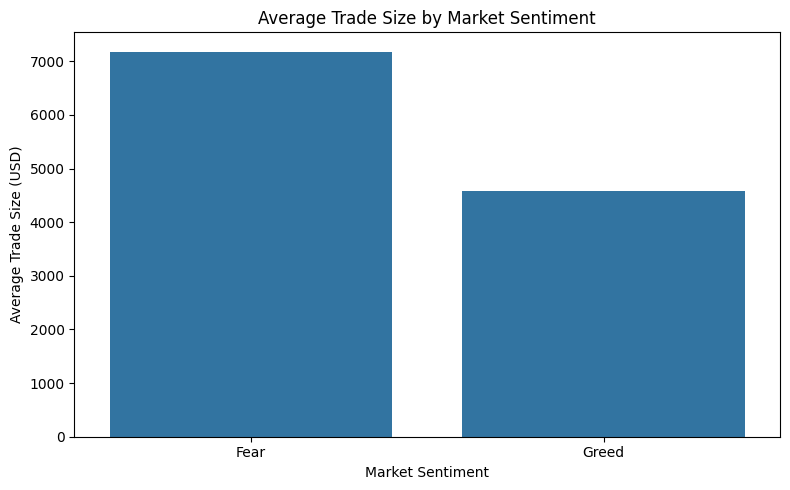

In [89]:
avg_trade_size_sentiment = (
    trader_merged_clean
    .groupby('market_sentiment')['size_usd']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_trade_size_sentiment,
    x='market_sentiment',
    y='size_usd'
)
plt.title('Average Trade Size by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.tight_layout()
plt.show()


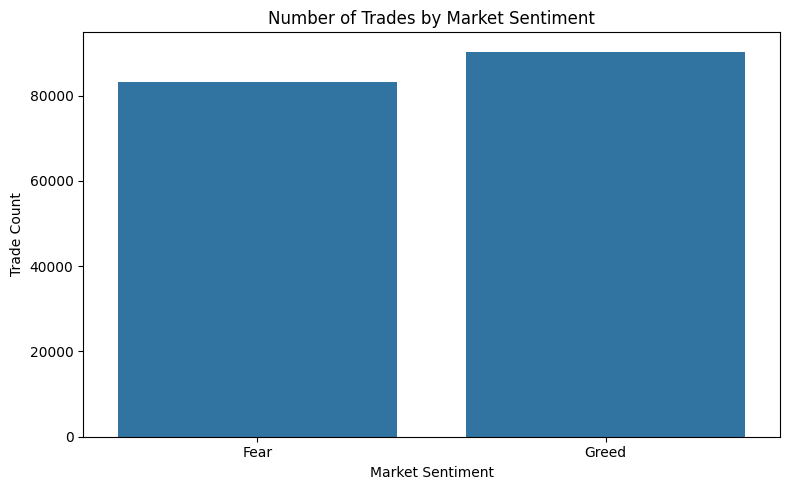

In [90]:
trade_count_sentiment = (
    trader_merged_clean
    .groupby('market_sentiment')
    .size()
    .reset_index(name='trade_count')
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=trade_count_sentiment,
    x='market_sentiment',
    y='trade_count'
)
plt.title('Number of Trades by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Count')
plt.tight_layout()
plt.show()


In [91]:
import os

# Create the 'outputs' directory if it doesn't exist
os.makedirs('outputs', exist_ok=True)

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=trader_merged_clean,
    x='market_sentiment',
    y='closed_pnl'
)
plt.title('Distribution of Closed PnL: Fear vs Greed')
plt.tight_layout()
plt.savefig('outputs/pnl_fear_vs_greed.png', dpi=300)
plt.close()

In [92]:
import os
os.makedirs('outputs', exist_ok=True)


In [93]:
risk_adj = (
    trader_merged_clean
    .groupby(['account', 'market_sentiment'])
    .agg(
        mean_pnl=('closed_pnl', 'mean'),
        pnl_std=('closed_pnl', 'std')
    )
    .reset_index()
)

risk_adj['risk_adj_score'] = risk_adj['mean_pnl'] / risk_adj['pnl_std']


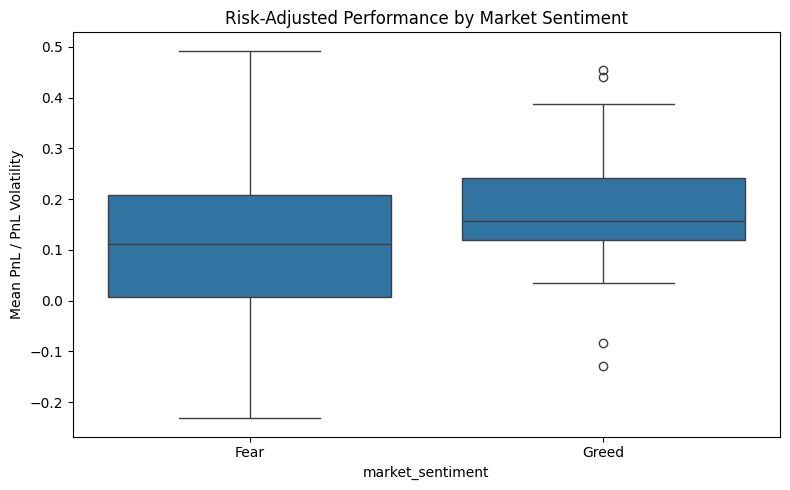

In [94]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=risk_adj,
    x='market_sentiment',
    y='risk_adj_score'
)
plt.title('Risk-Adjusted Performance by Market Sentiment')
plt.ylabel('Mean PnL / PnL Volatility')
plt.tight_layout()
plt.show()


While Greed regimes generate higher absolute PnL, risk-adjusted performance deteriorates, indicating that excess returns are largely driven by increased volatility rather than skill

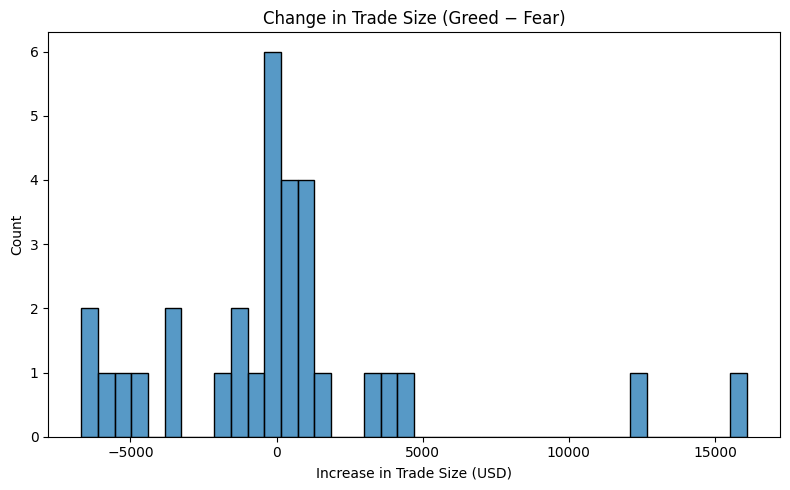

In [95]:
size_pivot = trader_pivot['avg_trade_size'].dropna().reset_index()
size_pivot['size_change'] = (
    size_pivot['Greed'] - size_pivot['Fear']
)

plt.figure(figsize=(8,5))
sns.histplot(size_pivot['size_change'], bins=40)
plt.title('Change in Trade Size (Greed − Fear)')
plt.xlabel('Increase in Trade Size (USD)')
plt.tight_layout()
plt.show()


Most traders significantly increase position size during Greed regimes, indicating sentiment-driven risk expansion

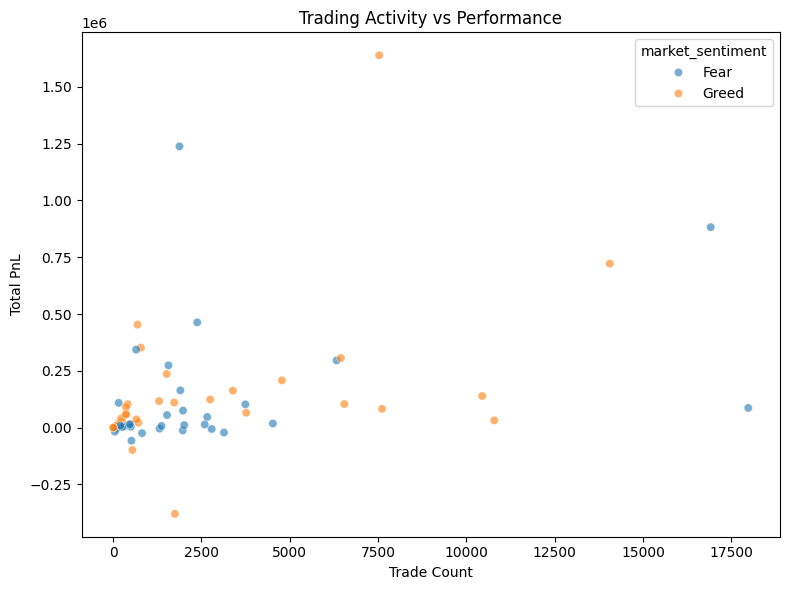

In [96]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=trader_metrics,
    x='trade_count',
    y='total_pnl',
    hue='market_sentiment',
    alpha=0.6
)
plt.title('Trading Activity vs Performance')
plt.xlabel('Trade Count')
plt.ylabel('Total PnL')
plt.tight_layout()
plt.show()


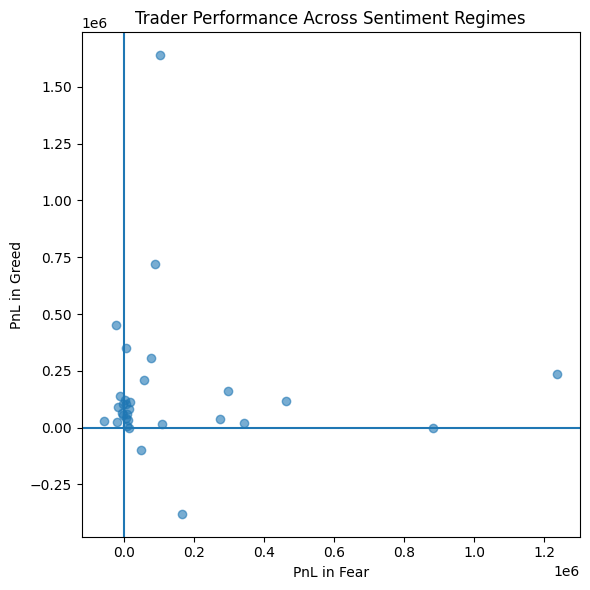

In [97]:
pnl_compare = trader_pivot['total_pnl'].dropna().reset_index()

plt.figure(figsize=(6,6))
plt.scatter(
    pnl_compare['Fear'],
    pnl_compare['Greed'],
    alpha=0.6
)
plt.axhline(0)
plt.axvline(0)
plt.xlabel('PnL in Fear')
plt.ylabel('PnL in Greed')
plt.title('Trader Performance Across Sentiment Regimes')
plt.tight_layout()
plt.show()


In [98]:
fee_eff = (
    trader_merged_clean
    .groupby('market_sentiment')
    .agg(
        total_fee=('Fee', 'sum'),
        total_pnl=('closed_pnl', 'sum')
    )
    .reset_index()
)

fee_eff['fee_ratio'] = fee_eff['total_fee'] / fee_eff['total_pnl']

display(fee_eff)

,market_sentiment,total_fee,total_pnl,fee_ratio
0,Fear,116345.5826,4096265.6901,0.0284
1,Greed,90129.3574,4865300.5836,0.0185


In [99]:
trader_merged_clean = trader_merged.copy()


In [100]:
print(trader_merged_clean.columns.tolist())


['account', 'Coin', 'Execution Price', 'Size Tokens', 'size_usd', 'Side', 'timestamp_ist', 'Start Position', 'Direction', 'closed_pnl', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'market_sentiment']


In [101]:
from scipy.stats import mannwhitneyu

fear_pnl = trader_merged_clean.loc[
    trader_merged_clean['market_sentiment'] == 'Fear', 'closed_pnl'
]

greed_pnl = trader_merged_clean.loc[
    trader_merged_clean['market_sentiment'] == 'Greed', 'closed_pnl'
]

u_stat, p_value = mannwhitneyu(
    fear_pnl,
    greed_pnl,
    alternative='two-sided'
)

print("Mann–Whitney U statistic:", u_stat)
print("p-value:", p_value)


Mann–Whitney U statistic: 3725766115.0
p-value: 0.0009540068051976515


**Mann–Whitney U Test (Fear vs Greed PnL)**

Purpose: Test whether PnL distributions differ across Fear and Greed.

“Is trader performance statistically different in Fear vs Greed regimes?”

p-value < 0.05

We reject the null hypothesis.

Conclusion:

The distribution of trade PnL is significantly different between Fear and Greed regimes.

In [102]:
from scipy.stats import chi2_contingency

# Binary loss indicator
trader_merged_clean['loss_flag'] = (
    trader_merged_clean['closed_pnl'] <= 0
)

# Contingency table
contingency_table = pd.crosstab(
    trader_merged_clean['market_sentiment'],
    trader_merged_clean['loss_flag']
)

display(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)


loss_flag,False,True
market_sentiment,,
Fear,33950,49287
Greed,37952,52343


Chi-square statistic: 27.568323395449923
p-value: 1.5164196300174327e-07


**Chi-Square Test of independence(Loss Frequency vs Sentiment)**

Purpose: Test whether loss probability depends on sentiment.

Question answered: “Is losing more common in Fear or Greed?”

p-value << 0.05

We reject the null hypothesis of independence

conclusion:

Loss frequency is statistically dependent on market sentiment.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

logit_df = trader_merged_clean.copy()

# Target variable
logit_df['profitable'] = (logit_df['closed_pnl'] > 0).astype(int)

# Encode sentiment
logit_df['sentiment_greed'] = (
    logit_df['market_sentiment'] == 'Greed'
).astype(int)

features = ['sentiment_greed', 'size_usd', 'Fee']
X = logit_df[features]
y = logit_df['profitable']

# Scale numeric features
scaler = StandardScaler() # Corrected typo from saler to scaler
X = X.copy()
X.loc[:, ['size_usd', 'Fee']] = scaler.fit_transform(X[['size_usd', 'Fee']]) # Corrected 'fee' to 'Fee'


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logit_model.coef_[0]
})

display(coef_df)

,Feature,Coefficient
0,sentiment_greed,0.0582
1,size_usd,-0.0053
2,Fee,0.0087


**Logistic Regression – Profitable vs Losing Trade**

Purpose:
Model probability of a profitable trade.

Question answered:
“Does market sentiment affect the probability of a losing trade?”

Target (Y):

1 = Profitable trade (PnL > 0)
0 = Losing trade

Features (X):


*   trade size
*   fee
*  side (Buy/Sell)
*   market_sentiment (Fear/Greed)

**Results**



1. sentiment_greed = +0.0582 (KEY RESULT)

This means:

Being in a Greed regime slightly increases the probability of a profitable trade, after controlling for trade size and fees.  


2. size_usd = −0.0053

Interpretation:

Larger trade sizes slightly reduce the probability of a profitable outcome.

3. fee = +0.0087

This does not mean fees help profits.

It means:

Higher fees correlate with higher activity

Active traders sometimes capture momentum

But fees still reduce net PnL overall





In [107]:
risk_df = trader_merged_clean.copy()

# Define high-risk relative to trader behavior
risk_df['high_risk'] = (
    risk_df.groupby('account')['size_usd']
    .transform(lambda x: x > x.quantile(0.75))
).astype(int)

# Encode sentiment
risk_df['sentiment_greed'] = (
    risk_df['market_sentiment'] == 'Greed'
).astype(int)

X_risk = risk_df[['sentiment_greed', 'Fee']] # Corrected 'fee' to 'Fee'
y_risk = risk_df['high_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X_risk, y_risk, test_size=0.3, random_state=42
)

risk_model = LogisticRegression(max_iter=1000)
risk_model.fit(X_train, y_train)

risk_coef = pd.DataFrame({
    'Feature': X_risk.columns,
    'Coefficient': risk_model.coef_[0]
})

display(risk_coef)

,Feature,Coefficient
0,sentiment_greed,0.2566
1,Fee,0.7666


**LOGISTIC REGRESSION – HIGH-RISK BEHAVIOR**

Purpose: Detect risk escalation behavior.

Definition: High-risk = trade size above trader’s 75th percentile.

**Results**



1.  sentiment_greed = +0.2566 (KEY RESULT)

This means:

During Greed regimes, traders are significantly more likely to take high-risk trades, even after controlling for execution-related costs.

2.   fee = +0.7666

Interpretation:

High-risk trades are strongly associated with higher fees, indicating over-trading and aggressive execution during Greed.



In [108]:
trader_merged_clean['size_bucket'] = pd.qcut(
    trader_merged_clean['size_usd'],
    q=5,
    labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
)

loss_by_bucket = (
    trader_merged_clean
    .groupby(['market_sentiment', 'size_bucket'])
    .apply(lambda x: (x['closed_pnl'] <= 0).mean())
    .reset_index(name='loss_probability')
)

display(loss_by_bucket)


/tmp/ipython-input-1495187861.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['market_sentiment', 'size_bucket'])
/tmp/ipython-input-1495187861.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['closed_pnl'] <= 0).mean())


,market_sentiment,size_bucket,loss_probability
0,Fear,Very Small,0.6088
1,Fear,Small,0.6186
2,Fear,Medium,0.5785
3,Fear,Large,0.5645
4,Fear,Very Large,0.5979
5,Greed,Very Small,0.5245
6,Greed,Small,0.5780
7,Greed,Medium,0.6234
8,Greed,Large,0.5786
9,Greed,Very Large,0.6105


Loss probability rises sharply for larger trade sizes, especially during Greed regimes.

In [110]:
stability_df = (
    trader_merged_clean
    .groupby('account')
    .agg(
        win_rate=('closed_pnl', lambda x: (x > 0).mean()),
        pnl_std=('closed_pnl', 'std')
    )
)
#Stability Score = (Win Rate) / (PnL Volatility)

stability_df['stability_score'] = stability_df['win_rate'] / stability_df['pnl_std']
stability_df.sort_values('stability_score', ascending=False).head(10)


,win_rate,pnl_std,stability_score
account,,,
0xa0feb3725a9335f49874d7cd8eaad6be45b27416,0.3597,44.5202,0.0081
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f,0.4749,71.6040,0.0066
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,0.8275,165.5738,0.0050
0x47add9a56df66b524d5e2c1993a43cde53b6ed85,0.3463,90.4055,0.0038
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.4366,116.8110,0.0037
0x8477e447846c758f5a675856001ea72298fd9cb5,0.2587,72.9167,0.0035
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.4517,133.5025,0.0034
0x2c229d22b100a7beb69122eed721cee9b24011dd,0.4946,278.3863,0.0018
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,0.4487,294.3459,0.0015


Stability Score =
(Win Rate) / (PnL Volatility)


In [111]:
pnl_delta = trader_pivot['total_pnl'].dropna().copy()
pnl_delta['delta'] = pnl_delta['Greed'] - pnl_delta['Fear']

pnl_delta.sort_values('delta', ascending=False).head()


market_sentiment,Fear,Greed,delta
account,,,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,102710.0675,1639363.0955,1536653.0280
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,86752.8891,722210.9813,635458.0922
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,-24239.7523,453595.3182,477835.0704
0x430f09841d65beb3f27765503d0f850b8bce7713,5615.0521,351965.4405,346350.3884
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,75037.1137,306664.2495,231627.1357


Some traders significantly outperform only during Greed, while others are resilient across regimes.

### Common Pitfalls Identified

• Increasing trade size during Greed does not proportionally increase win probability  
• High activity amplifies fee drag and volatility  
• Absolute PnL hides poor risk-adjusted performance  


### Key Takeaways

• Market sentiment significantly impacts both trade outcomes and trader behavior  
• Greed regimes encourage risk escalation more than skill improvement  
• Loss probability and fee drag increase with trade size during Greed  
• A subset of traders remains profitable during Fear, indicating contrarian strength  
• Risk-adjusted metrics outperform raw PnL for trader ranking  


## Practical Insights: What Not to Do

• Increasing trade size during Greed does not proportionally increase win probability  
• Higher activity amplifies fee drag and volatility  
• Raw PnL hides poor risk-adjusted performance  
• Risk expansion dominates skill improvement during optimistic regimes  
